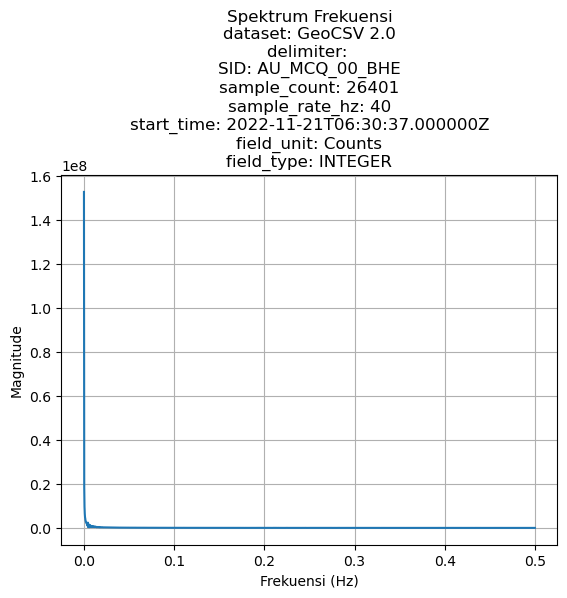

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Baca data dari file CSV
data = []
header_info = {}  # Untuk menyimpan informasi header
with open('C:/Users/Lenovo/JUPYTER LAB/data cianjur.csv', 'r') as file:
    csv_reader = csv.reader(file)
    
    # Baca informasi header
    for row in csv_reader:
        if len(row) > 0 and row[0].startswith('# '):
            key, value = row[0].split(': ')
            header_info[key[2:]] = value  # Menghilangkan tanda "#" dan menyimpan info header
        else:
            break  # Hentikan setelah membaca header

    # Baca data numerik
    for row in csv_reader:
        if len(row) > 0 and row[0].replace('.', '', 1).isdigit():
            data.append(float(row[0]))

# Konversi data menjadi array NumPy
data_array = np.array(data)

# Melakukan FFT
fft_result = np.fft.fft(data_array)
N = len(data_array)  # Jumlah data

# Menghitung frekuensi
Fs = 1.0  # Frekuensi sampel
frequencies = np.fft.fftfreq(N, 1/Fs)
positive_frequencies = frequencies[:N//2]
magnitude = np.abs(fft_result[:N//2])

# Plot spektrum frekuensi
plt.plot(positive_frequencies, magnitude)
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid()

# Menambahkan informasi header ke judul
info_str = "\n".join([f"{key}: {value}" for key, value in header_info.items()])
plt.title(f"Spektrum Frekuensi\n{info_str}")

plt.show()


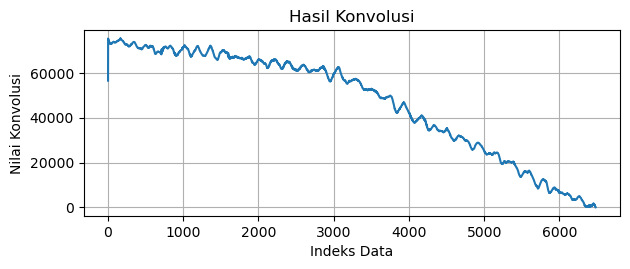

In [3]:
# Lakukan konvolusi pada data
kernel = np.array([0.5, 1.0, 0.5])  # Contoh kernel, sesuaikan dengan kebutuhan
convolved_data = np.convolve(data_array, kernel, 'same')

# Plot hasil konvolusi
plt.subplot(2, 1, 2)
plt.plot(convolved_data)
plt.xlabel('Indeks Data')
plt.ylabel('Nilai Konvolusi')
plt.grid()
plt.title('Hasil Konvolusi')

# Atur tata letak plot
plt.tight_layout()

# Tampilkan grafik
plt.show()